In [ ]:
from utils import input_pipeline
from utils import MMCombiner
from utils import PCTCombiner
from utils import PSCombiner

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import os
import dill as pkl

In [ ]:
data_np = np.load(os.path.join('data','task_3_training_e8da4715deef7d56_f8b7378_numpy.pkl'), allow_pickle=True)
data_pd = pd.read_pickle(os.path.join('data','task_3_training_e8da4715deef7d56_f8b7378_pandas.pkl'))
data_pd = data_pd.reset_index()

ids = data_pd[['pianist_id', 'segment_id', 'snippet_id']]

y = data_pd.iloc[:,data_pd.columns.get_loc('quadrant'):]
features = data_pd.iloc[:,4:data_pd.columns.get_loc('quadrant')]

""""
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)
X_train = X_train.reset_index()
X_train = X_train.drop(columns='index')
y_train = y_train.reset_index()
ids_train, ids_test = ids.loc[X_train.index], ids.loc[X_test.index]

highlevels_train = y_train.iloc[:,y_train.columns.get_loc('gems_wonder'):]
highlevels_test = y_test.iloc[:,y_test.columns.get_loc('gems_wonder'):]

y_train = y_train['quadrant']
y_test = y_test['quadrant'] 

X_train_transformed = input_pipeline.fit_transform(X_train)
X_test_transformed = input_pipeline.fit_transform(X_test)
"""

'"\nX_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)\nX_train = X_train.reset_index()\nX_train = X_train.drop(columns=\'index\')\ny_train = y_train.reset_index()\nids_train, ids_test = ids.loc[X_train.index], ids.loc[X_test.index]\n\nhighlevels_train = y_train.iloc[:,y_train.columns.get_loc(\'gems_wonder\'):]\nhighlevels_test = y_test.iloc[:,y_test.columns.get_loc(\'gems_wonder\'):]\n\ny_train = y_train[\'quadrant\']\ny_test = y_test[\'quadrant\'] \n\nX_train_transformed = input_pipeline.fit_transform(X_train)\nX_test_transformed = input_pipeline.fit_transform(X_test)\n'

In [ ]:
cur_ids = np.where(data_pd['pianist_id'] == 1)[0]

train_x, test_x, train_y, test_y = train_test_split(features.iloc[cur_ids], y.iloc[cur_ids], test_size=0.2, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

for n in range(2,12):
    cur_ids = np.where(data_pd['pianist_id'] == n)[0]
    cur_train_x, cur_test_x, cur_train_y, cur_test_y = train_test_split(features.iloc[cur_ids], y.iloc[cur_ids], test_size=0.2, random_state=42)
    cur_train_x, cur_val_x, cur_train_y, cur_val_y = train_test_split(cur_train_x, cur_train_y, test_size=0.2, random_state=42)

    train_x = train_x.append(cur_train_x)
    train_y = train_y.append(cur_train_y)
    test_x = test_x.append(cur_test_x)
    test_y = test_y.append(cur_test_y)
    val_x = val_x.append(cur_val_x)
    val_y = val_y.append(cur_val_y)

    assert len(train_x) == len(train_y)
    assert len(test_x) == len(test_y)
    assert len(val_x) == len(val_y)

X_train = train_x
y_train = train_y
X_test = test_x
y_test = test_y
X_val = val_x
y_val = val_y
X_all = features.copy()
y_all = y.copy()

In [ ]:
X_train = X_train.reset_index()
X_train = X_train.drop(columns='index')
y_train = y_train.reset_index()
ids_train, ids_test, ids_val = ids.loc[X_train.index], ids.loc[X_test.index], ids.loc[X_val.index]

highlevels_train = y_train.iloc[:,y_train.columns.get_loc('gems_wonder'):]
highlevels_test = y_test.iloc[:,y_test.columns.get_loc('gems_wonder'):]
highlevels_val = y_test.iloc[:,y_val.columns.get_loc('gems_wonder'):]

y_train = y_train['quadrant']
y_test = y_test['quadrant'] 
y_val = y_val['quadrant']
y_all = y_all['quadrant']

X_train_transformed = input_pipeline.fit_transform(X_train)
X_test_transformed = input_pipeline.fit_transform(X_test)
X_val_transformed = input_pipeline.fit_transform(X_val)
X_all_transformed = input_pipeline.fit_transform(X_all)

In [ ]:
gem_classifiers = pkl.load(open(os.path.join('models', 'gem_classifiers.pkl'), 'rb'))

scaler_train = StandardScaler()
X_train_new = scaler_train.fit_transform(X_train_transformed)
scaler_test = StandardScaler()
X_test_new = scaler_test.fit_transform(X_test_transformed)
scaler_val = StandardScaler()
X_val_new = scaler_val.fit_transform(X_val_transformed)
scaler_all = StandardScaler()
X_all_new = scaler_all.fit_transform(X_all_transformed)

for clf in gem_classifiers.values():
    
    X_train_transformed = np.c_[X_train_transformed, clf.predict(X_train_new)]
    X_test_transformed = np.c_[X_test_transformed, clf.predict(X_test_new)]
    X_val_transformed = np.c_[X_val_transformed, clf.predict(X_val_new)]
    X_all_transformed = np.c_[X_all_transformed, clf.predict(X_all_new)]

scaler_train_total = StandardScaler()
X_train_transformed = scaler_train_total.fit_transform(X_train_transformed)
scaler_test_total = StandardScaler()
X_test_transformed = scaler_test_total.fit_transform(X_test_transformed)
scaler_val_total = StandardScaler()
X_val_transformed = scaler_val_total.fit_transform(X_val_transformed)
scaler_all_total = StandardScaler()
X_all_transformed = scaler_all_total.fit_transform(X_all_transformed)

In [ ]:
highlevels_train.to_pickle(os.path.join('data', 'highlevels_train.pkl'))
highlevels_test.to_pickle(os.path.join('data', 'highlevels_test.pkl'))
highlevels_val.to_pickle(os.path.join('data', 'highlevels_val.pkl'))

y_train.to_pickle(os.path.join('data', 'y_train.pkl'))
y_test.to_pickle(os.path.join('data', 'y_test.pkl'))
y_val.to_pickle(os.path.join('data', 'y_val.pkl'))
y_all.to_pickle(os.path.join('data', 'y_all.pkl'))

np.save(arr=X_train_transformed, file=os.path.join('data', 'X_train_transformed'), allow_pickle=True)
np.save(arr=X_test_transformed, file=os.path.join('data', 'X_test_transformed'), allow_pickle=True)
np.save(arr=X_val_transformed, file=os.path.join('data', 'X_val_transformed'), allow_pickle=True)
np.save(arr=X_all_transformed, file=os.path.join('data', 'X_all_transformed'), allow_pickle=True)
X_train.to_pickle(os.path.join('data', 'X_train.pkl'))
X_test.to_pickle(os.path.join('data', 'X_test.pkl'))
X_val.to_pickle(os.path.join('data', 'X_val.pkl'))
X_all.to_pickle(os.path.join('data', 'X_all.pkl'))

In [ ]:
def cross_validation_split(ids:pd.DataFrame, X:pd.DataFrame, y):
    # Pianist split
    pianist_ids = np.unique(ids['pianist_id'])
    p1, p2 = train_test_split(pianist_ids, test_size=0.5)
    p1_ids, p2_ids = np.where(ids['pianist_id'].isin(p1)), np.where(ids['pianist_id'].isin(p2))
    fold1, fold2 = ids.iloc[p1_ids], ids.iloc[p2_ids]

    # Segment split
    p1_seg, p2_seg = np.unique(fold1['segment_id']), np.unique(fold2['segment_id'])
    s1, s2 = train_test_split(p1_seg, test_size=0.5)
    s3, s4 = train_test_split(p2_seg, test_size=0.5)
    s1_ids, s2_ids, s3_ids, s4_ids = np.where(fold1['segment_id'].isin(s1)), np.where(fold1['segment_id'].isin(s2)), np.where(fold2['segment_id'].isin(s3)),\
                                     np.where(fold2['segment_id'].isin(s4))
    fold11, fold12, fold21, fold22 = fold1.iloc[s1_ids], fold1.iloc[s2_ids], fold2.iloc[s3_ids], fold2.iloc[s4_ids] 

    # Snippet split
    s1_sn, s2_sn, s3_sn, s4_sn = np.unique(fold11['snippet_id']), np.unique(fold12['snippet_id']), np.unique(fold21['snippet_id']),\
                                 np.unique(fold22['snippet_id'])
    sn1, sn2 = train_test_split(s1_sn, test_size=0.5)
    sn3, sn4 = train_test_split(s2_sn, test_size=0.5)
    sn5, sn6 = train_test_split(s3_sn, test_size=0.5)
    sn7, sn8 = train_test_split(s4_sn, test_size=0.5)
    sn1_ids, sn2_ids, sn3_ids, sn4_ids, sn5_ids, sn6_ids, sn7_ids, sn8_ids = np.where(fold11['snippet_id'].isin(sn1)), np.where(fold11['snippet_id'].isin(sn2)), \
                                                                             np.where(fold12['snippet_id'].isin(sn3)), np.where(fold12['snippet_id'].isin(sn4)), \
                                                                             np.where(fold21['snippet_id'].isin(sn5)), np.where(fold21['snippet_id'].isin(sn6)), \
                                                                             np.where(fold22['snippet_id'].isin(sn7)), np.where(fold22['snippet_id'].isin(sn8))
    fold111, fold112, fold121, fold122, fold211, fold212, fold221, fold222 = fold11.iloc[sn1_ids], fold11.iloc[sn2_ids], fold12.iloc[sn3_ids], fold12.iloc[sn4_ids],\
                                                                             fold21.iloc[sn5_ids], fold21.iloc[sn6_ids], fold22.iloc[sn7_ids], fold22.iloc[sn8_ids]                     

    X_fold1, X_fold2, X_fold3, X_fold4, X_fold5, X_fold6, X_fold7, X_fold8 = X.loc[fold111.index], X.loc[fold112.index], X.loc[fold121.index], X.loc[fold122.index], \
                                                                             X.loc[fold211.index], X.loc[fold212.index], X.loc[fold221.index], X.loc[fold222.index]
    y_fold1, y_fold2, y_fold3, y_fold4, y_fold5, y_fold6, y_fold7, y_fold8 = y.loc[fold111.index], y.loc[fold112.index], y.loc[fold121.index], y.loc[fold122.index], \
                                                                             y.loc[fold211.index], y.loc[fold212.index], y.loc[fold221.index], y.loc[fold222.index]

    return (X_fold1, X_fold2, X_fold3, X_fold4, X_fold5, X_fold6, X_fold7, X_fold8), (y_fold1, y_fold2, y_fold3, y_fold4, y_fold5, y_fold6, y_fold7, y_fold8)

In [ ]:
X_folds, y_folds = cross_validation_split(ids_train, X_train_transformed, y_train)

np.save(arr=X_folds, file=os.path.join('data', 'X_folds_tuple'), allow_pickle=True)
np.save(arr=y_folds, file=os.path.join('data', 'y_folds_tuple'), allow_pickle=True)

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

[]

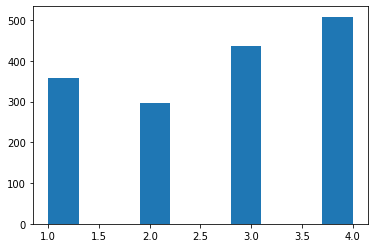

In [ ]:
# No need for Recall/Precision since no particular focus on one class --> Empirical Accuracy / Error best evaluation criterium
# Possible if 2 classifiers have same accuracy: ROC analysis
plt.hist(y_train)
plt.plot()

In [ ]:
from utils import PCTCombiner

In [ ]:
pct_combiner = PCTCombiner()
data_transformed = pct_combiner.fit_transform(data_pd)

In [ ]:
mm_combiner = MMCombiner()
mm_combiner.fit(data_pd)
pc = mm_combiner.pc
pcs = [np.mean(p) for p in pc]

([], [])

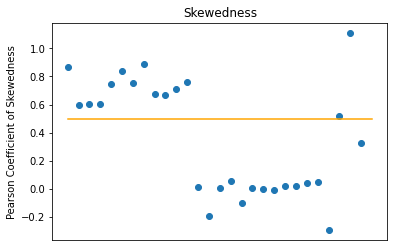

In [ ]:
plt.scatter(np.arange(len(pcs)), pcs)
plt.plot(np.linspace(0, len(pcs), 200), [0.5]*200, c='orange')
plt.title('Skewedness')
plt.ylabel('Pearson Coefficient of Skewedness')
plt.xticks([])

In [ ]:
pct = PCTCombiner()
mm = MMCombiner()
ps = PSCombiner()

print(len(features.columns))
step1 = pct.fit_transform(features)
print(len(step1.columns))
step2 = mm.fit_transform(step1)
print(len(step2.columns))
step3 = ps.fit_transform(step2)
print(len(step3.columns))

169
141
113
85


([], [])

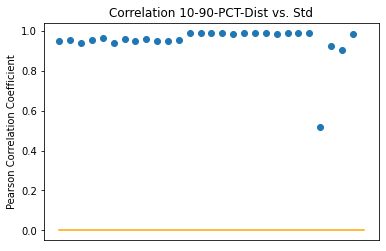

In [ ]:
c = ps.correlation_list
plt.scatter(np.arange(len(c)), c)
plt.plot(np.linspace(0, len(c), 200), [0]*200, c='orange')
plt.title('Correlation 10-90-PCT-Dist vs. Std')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks([])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gr_clf = GradientBoostingClassifier(n_estimators=10000, max_features='auto', max_depth=7, learning_rate=0.1, ccp_alpha=0)
gr_clf.fit(X_train_transformed, y_train)

GradientBoostingClassifier(ccp_alpha=0, max_depth=7, max_features='auto',
                           n_estimators=10000)

In [ ]:
gr_clf.score(X_test_transformed, y_test)

0.5430656934306569

In [ ]:
gr_clf.predict(X_train_transformed)

array([4., 1., 1., ..., 4., 1., 4.])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
highlevel_bin = y_train.iloc[:,y_train.columns.get_loc('gems_wonder_binary'):]
highlevels = pd.DataFrame()

rf_clf = RandomForestClassifier()
scores = {}
for n, gem in enumerate(y_train_bin.columns):
    clf = GradientBoostingClassifier()
    clf.fit(X_train, highlevel_bin[gem])
    scores[gem] = {'train': clf.score(X_train, highlevel_bin[gem]), 'test': clf.score(X_test, highlevel_bin[gem])}
    print(f'{n+1}/{len(y_train_bin.columns)} done')
    print(scores[gem])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e2905743-bdaf-45dd-a896-9824e6125426' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>